In [1]:
train_dir = './data/train'
validation_dir = './data/validation'

In [2]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Using TensorFlow backend.


In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 30000 images belonging to 3 classes.
Found 8070 images belonging to 3 classes.


In [4]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=30000//32,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=8070//32)

Epoch 1/30
937/937 [==============================] - 363s 388ms/step - loss: 0.8324 - acc: 0.5980 - val_loss: 0.6276 - val_acc: 0.7140
Epoch 2/30
937/937 [==============================] - 357s 381ms/step - loss: 0.6747 - acc: 0.6927 - val_loss: 0.5466 - val_acc: 0.7641
Epoch 3/30
937/937 [==============================] - 362s 387ms/step - loss: 0.6177 - acc: 0.7227 - val_loss: 0.5826 - val_acc: 0.7537
Epoch 4/30
937/937 [==============================] - 362s 386ms/step - loss: 0.5713 - acc: 0.7469 - val_loss: 0.4160 - val_acc: 0.8256
Epoch 5/30
937/937 [==============================] - 363s 388ms/step - loss: 0.5457 - acc: 0.7597 - val_loss: 0.5060 - val_acc: 0.7801
Epoch 6/30
937/937 [==============================] - 363s 388ms/step - loss: 0.5166 - acc: 0.7780 - val_loss: 0.3956 - val_acc: 0.8362
Epoch 7/30
937/937 [==============================] - 364s 389ms/step - loss: 0.5018 - acc: 0.7816 - val_loss: 0.4045 - val_acc: 0.8242
Epoch 8/30
937/937 [============================

In [5]:
model.save_weights('gotowyyW.h5')
model.save('gotowyy.h5')

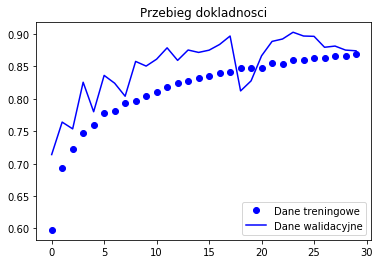

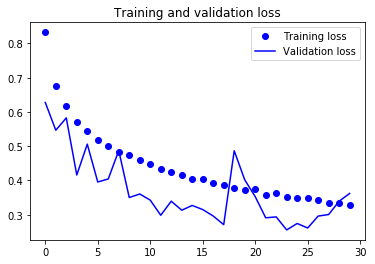

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Dane treningowe')
plt.plot(epochs, val_acc, 'b', label='Dane walidacyjne')
plt.title('Przebieg dokladnosci')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()